# Homework 1 (100 points)

This homework focuses on the pandas library and clustering. There are no python library restrictions for this homework. Suggested libraries are pandas, numpy, regex, and sklearn.

## Submission Instructions
**When completing your homework and preparing for the final submission on GitHub, it's important to ensure that you not only push the final .ipynb file but also create a PDF version of the notebook and include it in the repository. This PDF version serves as an essential backup and ensures that your work is easily accessible for grading. Once both the .ipynb and .pdf files are in the GitHub repository, be sure to add a link to the GitHub repository in Gradescope for assessment. `Please note that failing to submit the .pdf file as part of your assignment may result in point deductions, so it's crucial to follow these steps diligently to ensure a complete and successful submission.`**

## Exercise 1 (40 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines (except for `e` and `m`)

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

#### a) Write a function that reads in a filepath to a csv and returns the DataFrame. (1 point)

In [1]:
import pandas as pd

def read_csv_file(filepath):
    df = pd.read_csv(filepath)
    return df

filepath = 'train.csv'
df = read_csv_file(filepath)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### b) Write a function that returns the number of rows that have at least one empty column value - (2 points)

In [2]:
def num_nans(df):
    return df.isna().any(axis=1).sum()

print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 708 rows with at least one empty value


#### c) Write a function that removes all columns with more than 200 NaN values - (2 points)

In [3]:
def drop_na(df):
    return df.dropna(axis=1, thresh=len(df) - 200)

df = drop_na(df)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

#### d) Write a function that replaces `male` with 0 and `female` with 1 - (2 points)

In [4]:
def to_numerical(df):
    return df['Sex'].replace({'male':0, 'female':1})

df['Sex'] = to_numerical(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


#### e)  Transforming Names (9 points)

The dataset contains a column called `Name` which consists of names in the following format: "Last Name, Title. First Name Middle Name" (e.g., "Braund, Mr. Owen Harris"). In this question, you will write a Python function to extract and separate various components of the `Name` into four new columns: `First Name`, `Middle Name`, `Last Name`, and `Title`.

Write a Python function named `extract_names(df)` to accomplish this task. The function should take `df` as input and should return the four new columns.

For example, if the original `Name` column contains "Braund, Mr. Owen Harris", the resulting four columns should look like this:

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [5]:
import numpy as np

def extract_names(df):
    # Initialize new columns with empty strings
    df['First Name'] = ''
    df['Middle Name'] = ''
    df['Last Name'] = ''
    df['Title'] = ''

    # Iterate through each row in the DataFrame
    for index, row in df.iterrows():
           
        last_name, title_first_middle = row['Name'].split(', ', 1)

        title, first_middle = title_first_middle.split('. ', 1)

        first_middle_parts = first_middle.split(' ', 1)

        if(len(first_middle_parts) < 2):
            first_name = first_middle_parts[0]
            middle_name = np.nan
        else:
            first_name, middle_name = first_middle_parts
            
        df.at[index, 'Last Name'] = last_name
        df.at[index, 'Title'] = title
        df.at[index, 'First Name'] = first_name
        df.at[index, 'Middle Name'] = middle_name

    return df[['First Name', 'Middle Name', 'Last Name', 'Title']]


df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley (Florence Briggs Thayer),Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,NaN,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath (Lily May Peel),Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,Q,James,NaN,Moran,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,S,Timothy,J,McCarthy,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,S,Gosta,Leonard,Palsson,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,S,Oscar,W (Elisabeth Vilhelmina Berg),Johnson,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,C,Nicholas,(Adele Achem),Nasser,Mrs


#### f) Write a function that replaces all missing ages with the average age - (2 points)

In [6]:
import numpy as np

def replace_with_mean(df):
    df1 = pd.DataFrame()
    df1['Age'] = df['Age'].copy()
    non_null_values = df1['Age'].dropna().tolist()
    mean = np.mean(non_null_values)
    df1.fillna(mean, inplace=True)
    return df1
df['Age'] = replace_with_mean(df)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C,John,Bradley (Florence Briggs Thayer),Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S,Laina,NaN,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,S,Jacques,Heath (Lily May Peel),Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S,William,Henry,Allen,Mr
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,Q,James,NaN,Moran,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,S,Timothy,J,McCarthy,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,S,Gosta,Leonard,Palsson,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,S,Oscar,W (Elisabeth Vilhelmina Berg),Johnson,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,C,Nicholas,(Adele Achem),Nasser,Mrs


`The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.`

#### g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (1 point)

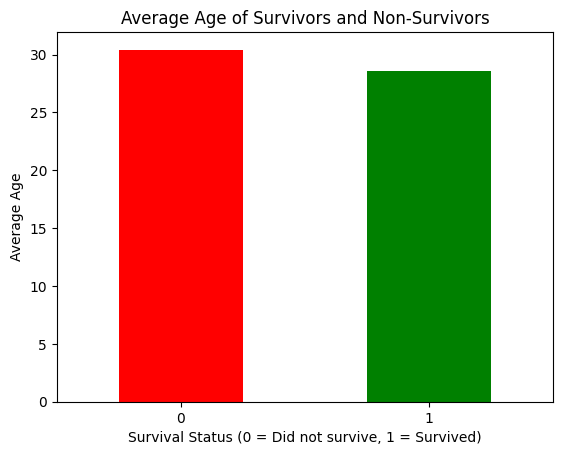

In [7]:
# your code here
import matplotlib.pyplot as plt

def plot_avg_age_survival(df):
    avg_age_survival = df.groupby('Survived')['Age'].mean()

    avg_age_survival.plot(kind='bar', color=['red','green'])
    plt.title('Average Age of Survivors and Non-Survivors')
    plt.xlabel('Survival Status (0 = Did not survive, 1 = Survived)')
    plt.ylabel('Average Age')
    plt.xticks(rotation=0)
    plt.show()


plot_avg_age_survival(df)


those who survived on average are younger than those who didnt.


#### h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (1 point)

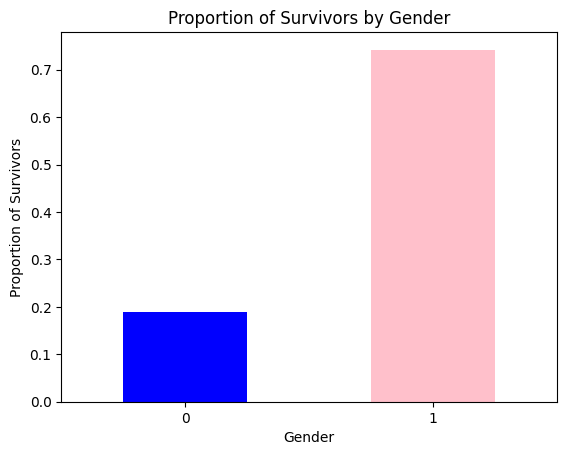

In [8]:
# your code here
def plot_survival_proportion(df):
    gender_survival_counts = df.groupby(['Sex', 'Survived']).size().unstack()

    survival_proportion = gender_survival_counts.div(gender_survival_counts.sum(axis=1), axis=0)[1]

    survival_proportion.plot(kind='bar', color=['blue', 'pink'])
    plt.title('Proportion of Survivors by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Proportion of Survivors')
    plt.xticks(rotation=0)
    plt.show()

plot_survival_proportion(df)

We can observe that there is a higher survival rate for females: The survival rate for females is significantly higher than that for males. The proportion of females who survived is more than 0.7, while the proportion of males who survived is around 0.2. This suggests a substantial gender disparity in survival rates.


#### i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (2 points)

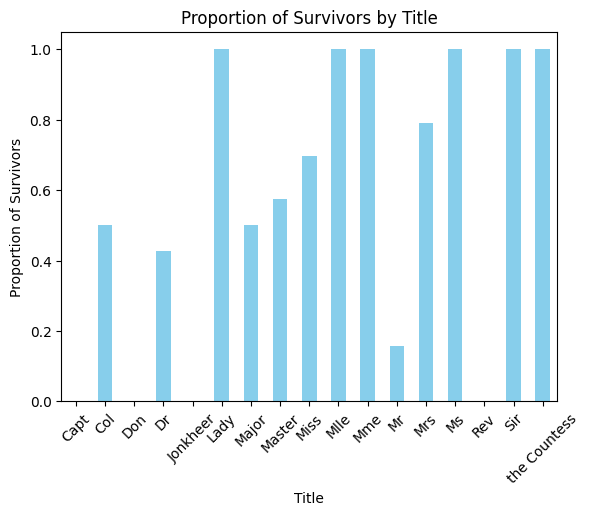

In [9]:
def plot_survival_by_title(df):

    title_survival_counts = df.groupby(['Title', 'Survived']).size().unstack()


    survival_proportion = title_survival_counts.div(title_survival_counts.sum(axis=1), axis=0)[1]

    survival_proportion.plot(kind='bar', color='skyblue')
    plt.title('Proportion of Survivors by Title')
    plt.xlabel('Title')
    plt.ylabel('Proportion of Survivors')
    plt.xticks(rotation=45)
    plt.show()


plot_survival_by_title(df)

Certain titles had a 100% survival rate, while others had a 0% rate


#### j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (2 points)

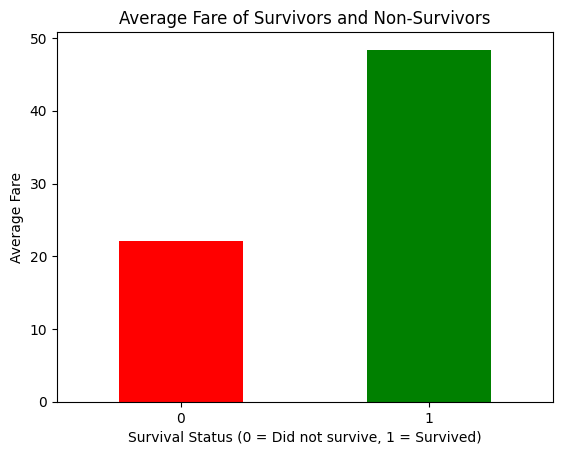

In [10]:
def plot_avg_fare_survival(df):

    avg_fare_survival = df.groupby('Survived')['Fare'].mean()

    avg_fare_survival.plot(kind='bar', color=['red', 'green'])
    plt.title('Average Fare of Survivors and Non-Survivors')
    plt.xlabel('Survival Status (0 = Did not survive, 1 = Survived)')
    plt.ylabel('Average Fare')
    plt.xticks(rotation=0)
    plt.show()


plot_avg_fare_survival(df)

those who survived paid a higher fare on average.


#### k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (2 points)

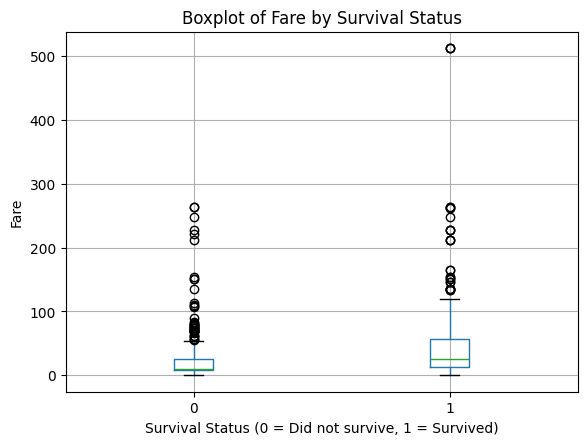

In [11]:
def plot_fare_boxplot(df):
    df.boxplot(column='Fare', by='Survived')
    plt.title('Boxplot of Fare by Survival Status')
    plt.suptitle('')
    plt.xlabel('Survival Status (0 = Did not survive, 1 = Survived)')
    plt.ylabel('Fare')
    plt.show()

plot_fare_boxplot(df)

the variance of the fare of those who survived is higher

#### l) Create a function to subtract the mean fare from the actual fare then

*   List item
*   List item

divide by the standard deviation - (2 points)

In [12]:
def standardize_fare(df):
    mean_fare = df['Fare'].mean()
    std_fare = df['Fare'].std()
    standardized_fare = (df['Fare'] - mean_fare) / std_fare
    return standardized_fare

df['Standardized_Fare'] = standardize_fare(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title,Standardized_Fare
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr,-0.502163
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley (Florence Briggs Thayer),Cumings,Mrs,0.786404
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,NaN,Heikkinen,Miss,-0.488580
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath (Lily May Peel),Futrelle,Mrs,0.420494
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr,-0.486064


#### m) Remove all non-numerical columns from the dataframe. - (2 points)

In [13]:
import pandas as pd
import numpy as np  # Import NumPy

def remove_non_numerical_columns(df):
    numerical_df = df.select_dtypes(include=[np.number])
    return numerical_df

df = remove_non_numerical_columns(df)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Standardized_Fare
0,1,0,3,0,22.0,1,0,7.2500,-0.502163
1,2,1,1,1,38.0,1,0,71.2833,0.786404
2,3,1,3,1,26.0,0,0,7.9250,-0.488580
3,4,1,1,1,35.0,1,0,53.1000,0.420494
4,5,0,3,0,35.0,0,0,8.0500,-0.486064


#### n) Your task is to write a Python function, `N_most_similar_pairs(df, N)` (10pts)


Please use the dataset created from applying all the above transformations / modifications. This function calculates and returns the names of the N most similar pairs of passengers based on Euclidean distance. Additionally, you should ignore pairs that have a distance of zero.
Here's a step-by-step breakdown of the task:
1. Remove all non-numerical columns from the dataset (including Passenger ID), as we're only interested in numerical attributes for calculating similarity.
2. Calculate the Euclidean distance between each pair of passengers based on their numerical attributes. You can use python's any built-in function for this step.
3. Ignore pairs of passengers that have a distance of zero (meaning they are identical).
4. Find the N most similar pairs of passengers based on their Euclidean distances. These pairs should have the smallest distances.

In [14]:
import pandas as pd
import numpy as np
from scipy.spatial import distance_matrix

def N_most_similar_pairs(df, name_id_df, N):

    df_numerical = df.select_dtypes(include=[np.number]).drop(columns='PassengerId')
    distances = pd.DataFrame(distance_matrix(df_numerical.values, df_numerical.values), index=df.index, columns=df.index)
    np.fill_diagonal(distances.values, np.nan)


    most_similar_pairs = distances.stack().nsmallest(N*2).index.to_list()
    most_similar_pairs = [tuple(sorted(pair)) for pair in most_similar_pairs]  # Sort pairs to ensure uniqueness
    most_similar_pairs = list(set(most_similar_pairs))[:N]  # Remove duplicates and get top N pairs


    result = [(name_id_df.loc[pair[0], 'Name'], name_id_df.loc[pair[1], 'Name']) for pair in most_similar_pairs]

    return result


df_original = pd.read_csv('train.csv')
name_id_df = df_original[['PassengerId', 'Name']]
print("The 3 most similar pairs of passengers are: " + str(N_most_similar_pairs(df, name_id_df, 3)))



The 3 most similar pairs of passengers are: [('Allen, Mr. William Henry', 'Brocklebank, Mr. William Alfred'), ('Emir, Mr. Farred Chehab', 'Elias, Mr. Dibo'), ('Emir, Mr. Farred Chehab', 'Lahoud, Mr. Sarkis')]


## Exercise 2 (40 points)

This exercise will use the `fetch_olivetti_faces` dataset and challenge your understanding of clustering and K-means.

#### a) Using K-means, cluster the facial images into 10 clusters and plot the centroid of each cluster.

Hint: The centroid of each cluster has the same dimensions as the facial images in the dataset. - (10 points)

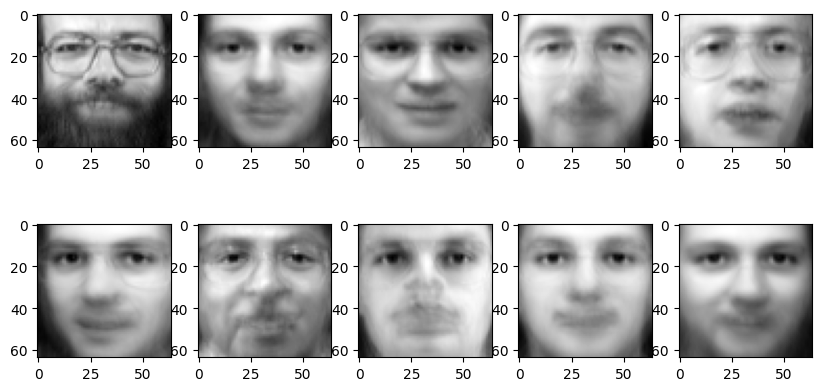

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces(shuffle=True, random_state=42)
faces_data = faces.data

# your code here

# 10 clusters kmeans
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(faces_data)

centers = kmeans.cluster_centers_

fig, axes = plt.subplots(2, 5, figsize=(10, 5),)

for i, ax in enumerate(axes.flat):
    ax.imshow(centers[i].reshape(64, 64), cmap = "gray")

plt.show()

#### b) Silhouette Scores
Now, let's compare the quality of the clustering obtained through K-means in part `a` with a different clustering generated from the labels attached to each image. Each image in the dataset is associated with a label corresponding to the person's identity. As a result, these labels can naturally generate a clustering where all images of the same person belong to the same cluster (e.g., all images of person A are in cluster A).

Your task is to calculate the silhouette score for the clustering obtained through K-means in part `a` and the clustering generated from the labels attached to each image.
Explain the results and differences in silhouette scores between the two clustering approaches.  - (10 points)

In [16]:
from sklearn.metrics import silhouette_score

kmeans_labels = kmeans.fit_predict(faces_data)
kmeans_score = silhouette_score(faces_data, kmeans_labels)
labels_score = silhouette_score(faces_data, faces.target)

print("k means score: " + str(kmeans_score))
print("labels score: " + str(labels_score))

k means score: 0.09155301
labels score: 0.10557363


The labels based score is higher because it uses true data that has been applied as a label to the image rather than calculations and estimations based on kmeans.

#### c) Plot a random image from the `fetch_olivetti_faces` dataset. - (5 points)

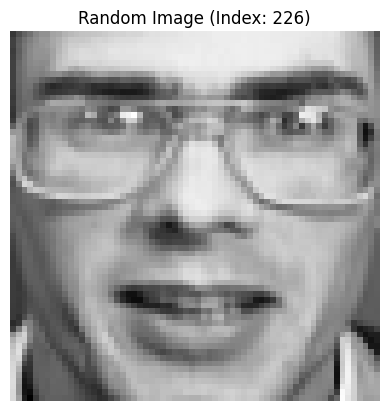

In [17]:
import numpy as np

id=np.random.randint(faces_data.shape[0])
face=faces_data[id].reshape(64, 64)

plt.imshow(face,cmap='gray')
plt.axis('off')
plt.title(f"Random Image (Index: {id})")
plt.show()

#### d) By applying K-Means clustering to this dataset, we are clustering for similar facial patterns and features. The centroid of each cluster will represent a facial pattern. You can then replace every pixel in the original image with the centroid of the cluster it was assigned to, thus only using K facial patterns to recreate the image. Using the same image as in c), produce an image that only uses 3 facial patterns (the 3 centroids of the clusters obtained by clustering the image itself using K-Means). - (10 points)

For example, if the left side is your original image, the transfomed image with 3 centroids should look like the right side

C:\Users\31400\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


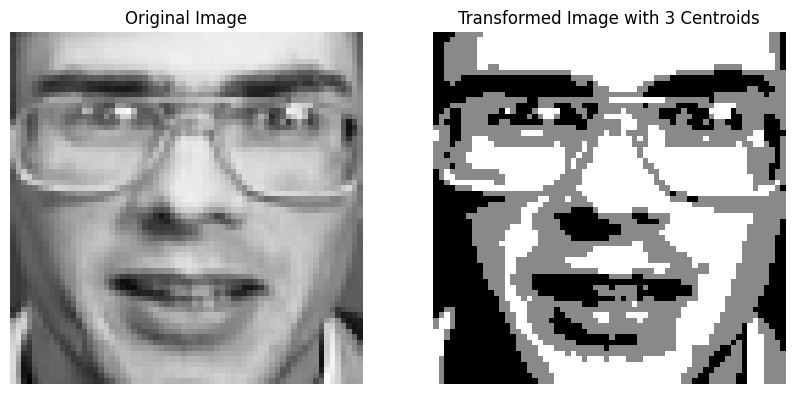

In [18]:
from IPython.display import Image
Image(filename="Example.png", width=600, height=600)

image_flat = face.reshape(-1, 1)

kmeans_image = KMeans(n_clusters=3, random_state=42)
clusters = kmeans_image.fit_predict(image_flat)

transformed_image = np.array([kmeans_image.cluster_centers_[cluster] for cluster in clusters])
transformed_image = transformed_image.reshape(64, 64)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(face, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original Image')

axes[1].imshow(transformed_image, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Transformed Image with 3 Centroids')

plt.show()



#### e) From the code above, write a function that can handle any number of chosen colors. Demonstrate it working on the same picture using 2 colors and 10 colors. - (5pts)

C:\Users\31400\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\31400\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


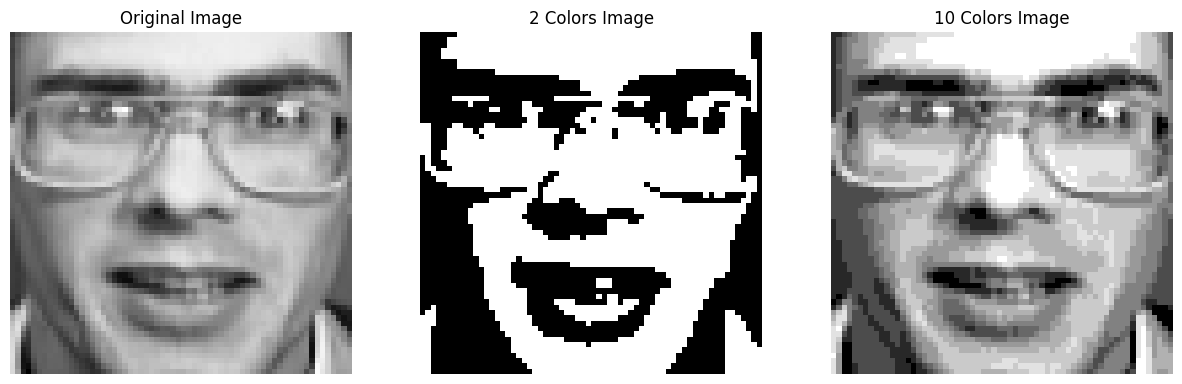

In [19]:
def reduce_image_colors(image, n_colors):

    image_flat = image.reshape(-1, 1)

    kmeans = KMeans(n_clusters=n_colors, random_state=42)
    kmeans.fit(image_flat)

    new_image_flat = kmeans.cluster_centers_[kmeans.predict(image_flat)]

    new_image = new_image_flat.reshape(image.shape)

    return new_image


reduced_2_colors = reduce_image_colors(face, 2)
reduced_10_colors = reduce_image_colors(face, 10)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

#original
ax[0].imshow(face, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

# 2 colors
ax[1].imshow(reduced_2_colors, cmap='gray')
ax[1].set_title("2 Colors Image")
ax[1].axis('off')

# 10 colors
ax[2].imshow(reduced_10_colors, cmap='gray')
ax[2].set_title("10 Colors Image")
ax[2].axis('off')

plt.show()


## Exercise 3 (20pts)

Using the kmeans code from class:

1. Create a 3D dataset. The dataset should be generated randomly (you can pick the variance / covariance) around the following centers: `[[0, 0, 0], [4, 4, 4], [-4, -4, 0], [-4, 0, 0]]` (5pts)
2. Modify the code from class to snapshot 3D images. (15pts) Make sure you:  
    a. use a `view_init` where the clusters and centers can easily be seen  
    b. set the appropriate `xlim`, `ylim` and `zlim` so that the plot doesn't change size

Please display your animation in the notebook (and pdf) in addition to adding it as a file to your repo.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from PIL import Image as im
from IPython import display

centers = np.array([[0, 0, 0], [4, 4, 4], [-4, -4, 0], [-4, 0, 0]])
X, _ = make_blobs(n_samples=300, centers=centers, cluster_std=1, random_state=0)

class KMeans():

    def __init__(self, data, k):
        self.data = data
        self.k = k
        self.assignment = [-1 for _ in range(len(data))]
        self.snaps = []

    def snap(self, centers):
        TEMPFILE = "temp.png"

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(self.data[:, 0], self.data[:, 1], self.data[:, 2], c=self.assignment)
        ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='r')
        ax.view_init(elev=50, azim=50)

        a = -5
        b = 5
        ax.set_xlim([a, b])  
        ax.set_ylim([a, b])
        ax.set_zlim([a, b])
        
        fig.savefig(TEMPFILE)
        plt.close()
        self.snaps.append(im.fromarray(np.asarray(im.open(TEMPFILE))))
    
    def initialize(self):
        return self.data[np.random.choice(range(len(self.data)), self.k, replace=False)]
    
    def distance(self, x, y):
        return np.linalg.norm(x - y)
    
    def assign(self, centers):
        for i in range(len(self.data)):
            delta = [float('inf'), 0]
            for j in range(len(centers)):
                distance = self.distance(centers[j], self.data[i])
                if distance < delta[0]:
                    delta[0] = distance 
                    delta[1] = j 
            
            self.assignment[i] = delta[1]

    def get_centers(self):
        centers = []

        for i in set(self.assignment):
            cluster = []

            for j in range(len(self.data)):
                if self.assignment[j] == i:
                    cluster.append(self.data[j])
            x = 0 
            y = 0
            z = 0

            for delta in range(len(cluster)):
                x+=cluster[delta][0]
                y+=cluster[delta][1]
                z+=cluster[delta][2]

            centers.append([x / len(cluster), y / len(cluster), z / len(cluster)])
        
        return np.array(centers)

    def is_diff_centers(self, centers, new_centers):
        n = len(centers)
        flag = 0
        for i in range(n):
            if centers[i][0]!=new_centers[i][0]:
                flag = 1
        
        if flag ==1:
            return True 
        return False

    def lloyds(self):
        centers = self.initialize()
        self.assign(centers)
        self.snap(centers)
        new_centers = self.get_centers()

        while self.is_diff_centers(centers, new_centers):
            self.assign(new_centers)
            centers = new_centers
            self.snap(centers)
            new_centers = self.get_centers()
        
        return

kmeans = KMeans(X, 4)
kmeans.lloyds()
images = kmeans.snaps

images[0].save(
    'kmeans.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)

def display_gif(fn):
    return display.HTML('<img src="{}">'.format(fn))

display_gif("kmeans.gif")
